<a href="https://colab.research.google.com/github/amazuzu/hackaton_2021/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Word Embedding

In [ ]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

In [ ]:
from sklearn.model_selection import train_test_split



sentences_train, sentences_test, y_train, y_test = train_test_split(twenty_train.data, twenty_train.target, test_size=0.25, random_state=1000)

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

print('---------------------------- sentences_train')
print(sentences_train[2])
print('---------------------------- X_train')
print(X_train[2])
print('---------------------------- y_train')
print(y_train[2])

print('---------------------------- sentences_test')
print(sentences_test[2])
print('---------------------------- y_test')
print(y_test[2])


vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index



---------------------------- sentences_train
From: dlecoint@garnet.acns.fsu.edu (Darius_Lecointe)
Subject: Re: Eternity of Hell (was Re: Hell)
Organization: Florida State University
Lines: 26

vic@mmalt.guild.org (Vic Kulikauskas) writes:
> Our Moderator writes:
> 
> > I'm inclined to read descriptions such as the lake of fire as 
> > indicating annihilation. However that's a minority view.
> ...
> > It's my personal view, but the only denominations I know of that hold 
> > it officially are the JW's and SDA's.
> 
> I can't find the reference right now, but didn't C.S.Lewis speculate 
> somewhere that hell might be "the state of once having been a human 
> soul"?
Why is it that we have this notion that God takes some sort of pleasure
from punishing people?  The purpose of hell is to destroy the devil and
his angels.

To the earlier poster who tried to support the eternal hell theory with
the fact that the fallen angels were not destroyed, remember the Bible
teaches that God has reserve

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
#-------------------------
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)


In [ ]:
print(dummy_y)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 1000

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[3, :])
print(X_test[3, :])

[   14 16065 21962   727    15  2701 16065    30    54  2101   196    26
    42     9    17     9    11 24540    35  7895 17139   647  3903    32
   350     7    61   690   436  1478   135   690    15  1096  1117    59
     7    61 13631 40196 40197  7895 21962   727    15 16065 21962   727
    15  2701 16065    59   137     1 32625 11377   160    11     9   799
    12    64     2   137    11     1   144  6513    66   357   530  4711
     6  3338   530    45     9     5   313     3   452   945    13   374
  6116    17    82    28     8    75   554   869     7    11 11378    12
     1  5015     2   162  2072     6  3338   604     1  5015    58    39
  3661     7    24     9   945     7    65 40198  2376    22     1   397
 24541   648   153     9     1  4712  2289    12     1  1801   123   363
    64   309    11    17   139   367    16    40   220   700     5   403
 16066    22    60  1735     7  7479  3371    34  8574  5250     2     1
  4711  1305  6377  1965    66   261     2   181  1

In [ ]:
from keras.models import Sequential
from keras import layers
import tensorflow as tf

embedding_dim = 40

print(f'vocab_size={vocab_size} input_length={maxlen}')

# create model
model = Sequential(name='xnet')
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen, name='embed'))
# model.add(layers.Flatten())
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(5, activation='relu',name='alpha'))
model.add(layers.Dense(20, activation='softmax', name='beta'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

vocab_size=116779 input_length=1000
Model: "xnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 1000, 40)          4671160   
_________________________________________________________________
global_max_pooling1d (Global (None, 40)                0         
_________________________________________________________________
alpha (Dense)                (None, 5)                 205       
_________________________________________________________________
beta (Dense)                 (None, 20)                120       
Total params: 4,671,485
Trainable params: 4,671,485
Non-trainable params: 0
_________________________________________________________________


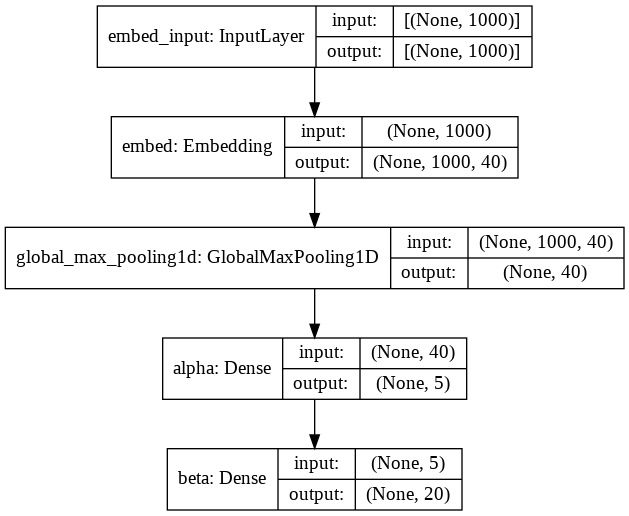

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(dummy_y.shape)
print(dummy_y_test.shape)

history = model.fit(X_train, dummy_y,
                    epochs=20,
                    verbose=False,   
                    validation_data=(X_test, dummy_y_test),                
                    batch_size=20)
#  


(8485, 1000)
(2829, 1000)
(8485, 20)
(2829, 20)


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Training Accuracy: 0.9980
Testing Accuracy:  0.7522


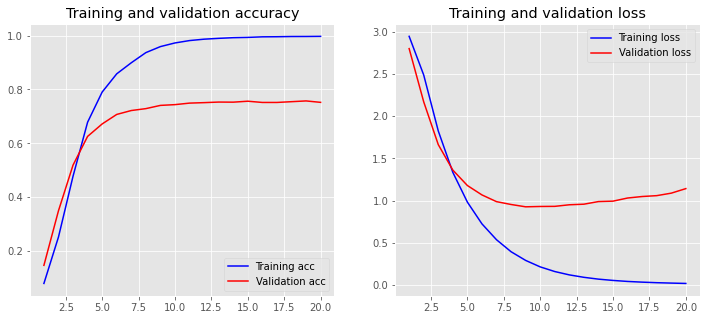

In [ ]:
loss, accuracy = model.evaluate(X_train, dummy_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, dummy_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
!wget --header="Host: nlp.stanford.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: _ga=GA1.2.456156586.1539718115; _gid=GA1.2.491677602.1539718115; _gat=1" --header="Connection: keep-alive" "https://nlp.stanford.edu/data/glove.6B.zip" -O "glove.6B.zip" -c


--2021-09-27 07:43:36--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-09-27 07:43:36--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.05MB/s    in 2m 40s  

2021-09-27 07:46:17 (5.12 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [ ]:
embedding_dim = 40
embedding_matrix = create_embedding_matrix(
    'glove.6B.300d.txt',
    tokenizer.word_index, embedding_dim)

In [ ]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.44744346158127746

Use trainable embeddings

In [ ]:
model = Sequential(name='xnet2')
model.add(layers.Embedding(
                          weights=[embedding_matrix],
                          trainable=False,
                          input_dim=vocab_size, 
                          output_dim=embedding_dim, 
                          input_length=maxlen, name='embed'))

# model.add(layers.Flatten())
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(5, activation='relu',name='alpha'))
model.add(layers.Dense(20, activation='softmax', name='beta'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "xnet2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 1000, 40)          4671160   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 40)                0         
_________________________________________________________________
alpha (Dense)                (None, 5)                 205       
_________________________________________________________________
beta (Dense)                 (None, 20)                120       
Total params: 4,671,485
Trainable params: 325
Non-trainable params: 4,671,160
_________________________________________________________________


In [ ]:
history2 = model.fit(X_train, dummy_y,
                    epochs=50,
                    verbose=False,   
                    validation_data=(X_test, dummy_y_test),                
                    batch_size=20)

Training Accuracy: 0.1572
Testing Accuracy:  0.1531


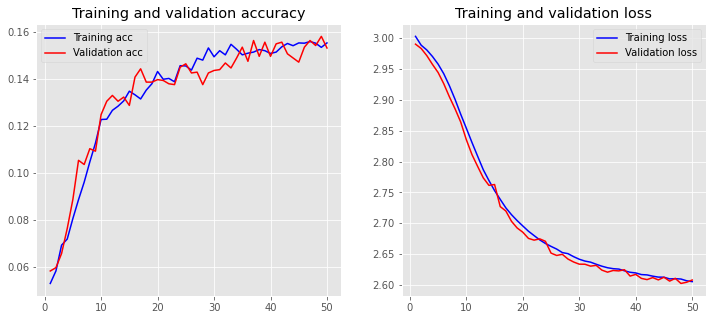

In [ ]:
loss, accuracy = model.evaluate(X_train, dummy_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, dummy_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history2)